# FBSP: Image processing - Point Processing
#### Author: Nick Yao Larsen
#### Email: nylarsen@cfin.au.dk

In this tutorial, we'll look at how to change image contrast, segmentation, and image arithmetic.

## Exercise 1
1. Load image 'Einstein.tif' (available on Moodle)
2. Display the image 'Einstein.tif' and its histogram (Create a function that can do that ```display_image_and_histogram```)
    * Note you need to remember to set ```vmin``` and ```vmax``` when running ```imshow```
3. Increase the intensity with 50 and display image and its histogram
4. Decrease the intensity with 80 and display image and its histogram
5. Apply linear stretching of the image
6. Cumulative stretching
7. Apply imbuilt contrast transformation

### Exercise 2:
1. Read the image 'blood1.tif' (available on Moodle) and convert it to grayscale and
2. Plot histogram and mark with a red line where you want to apply the threshold
double format
3. Apply the threshold of the image and display two images, where the first image is the original (grayscaled) whereas the second image is with the binary threshold
4. Apply the ```Otzu``` threshold on the image and display all three images
    * Bonus, you can add the threshold value in the text
5. Create salt and pepper noise on the image
6. Substract images
7. Display images
    - Explain the results
8. Apply binary mask to an image


### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import util

### 1.1 Load image 
Load image 'Einstein.tif' (available on Moodle)

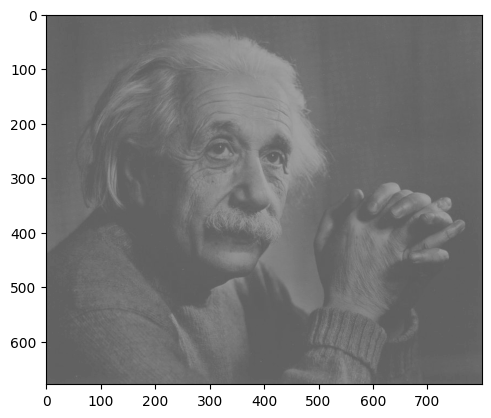

In [5]:
img = skimage.io.imread("Einstein.tif")
plt.imshow(img, cmap="gray", vmin = 0, vmax =255)
plt.show()

### 1.2 Display image and histogram
Display the image and the histogram of ```Einstein.tif```.
* Hint: Remember to convert the image file into an array of values when plotting the histogram. We call this procedure for ```flatten``` your data
* Hint -  use ```vmin``` and ```vmax``` inside ```plt.imshow```
* Hint - use ```range``` inside of ```plt.hist```
* Hint - use ```axes[NUMBER].set_adjustable('box')``` to make the image and the histogram equal

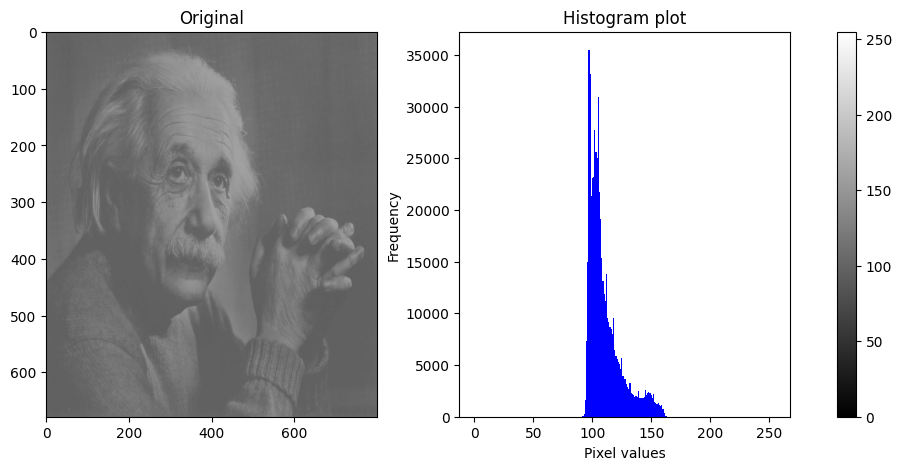

In [15]:
## CODE HERE
def display_image_and_histogram(img, img_title = "Original",hist_title = "Histogram plot"):
    fig, axes = plt.subplots(1,2, figsize =(12,5))
    plt.subplots_adjust(wspace=0.25)
    # Figure 1
    im = axes[0].imshow(img,cmap="gray", vmin=0,vmax=255, aspect="auto")
    axes[0].set_title(img_title)

    #figure 2
    axes[1].hist(img.flatten(), bins=256, range=(0,255), color="blue")
    axes[1].set_title(hist_title)
    axes[1].set_xlabel("Pixel values")
    axes[1].set_ylabel("Frequency")

    fig.colorbar(im, ax=axes, orientation="vertical")
    plt.show()
    
display_image_and_histogram(img)


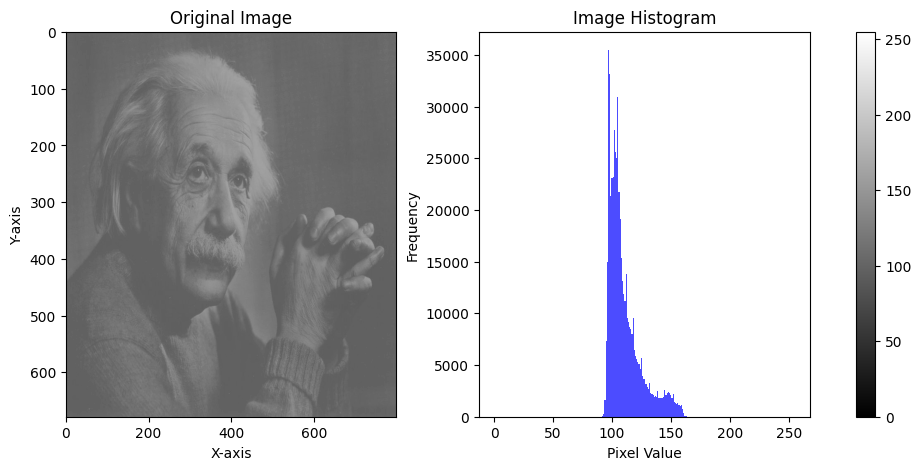

### 1.3 Increase the intensity with 50 and display image and its histogram

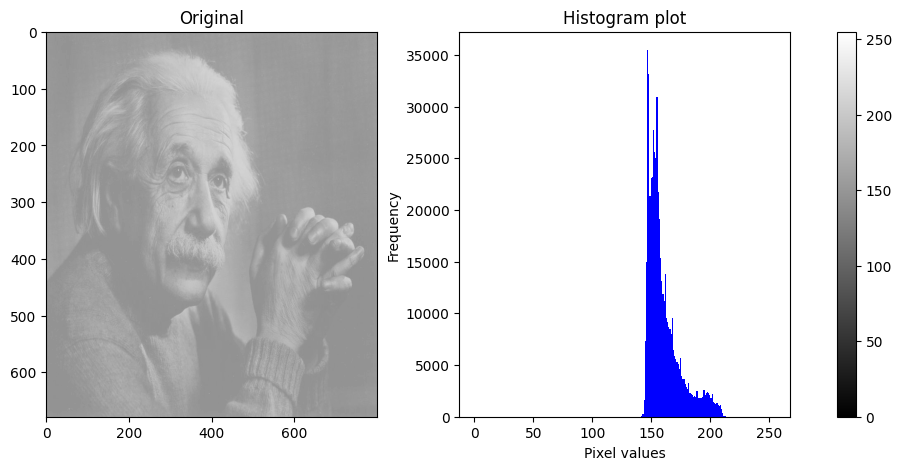

In [17]:
display_image_and_histogram(img+50)

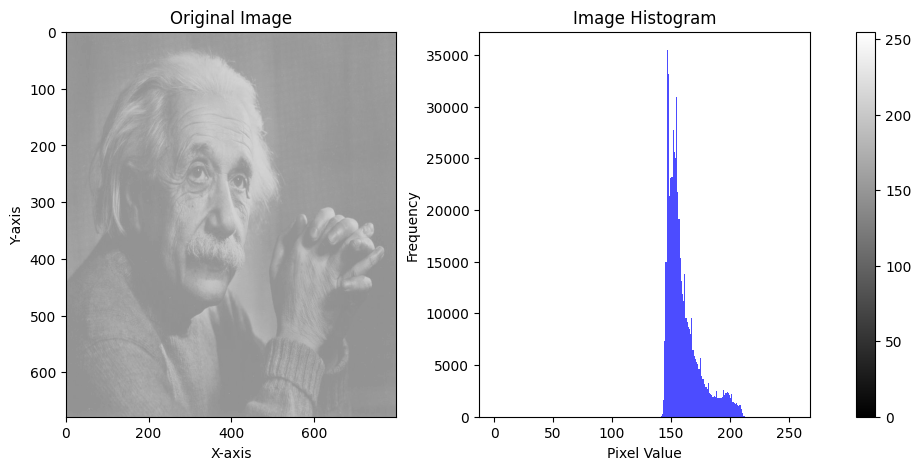

In [3]:
# CODE HERE

### 1.4 Decrease the intensity with 80 and display image and its histogram

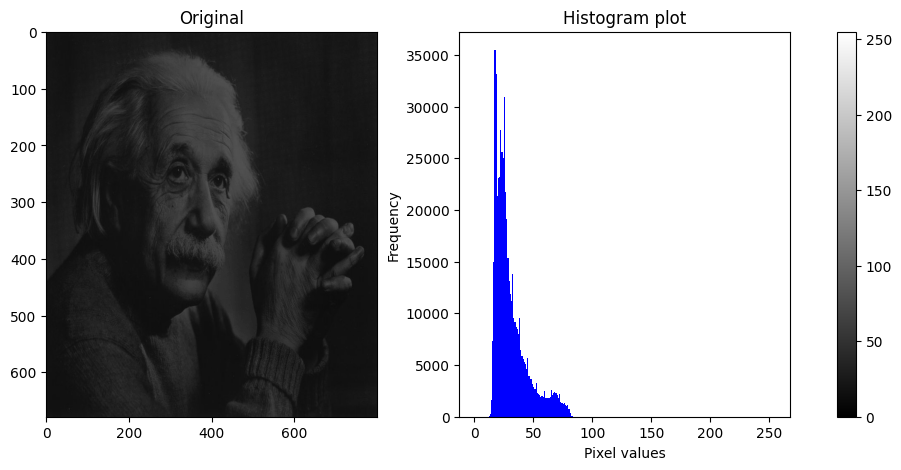

In [18]:
display_image_and_histogram(img-80)

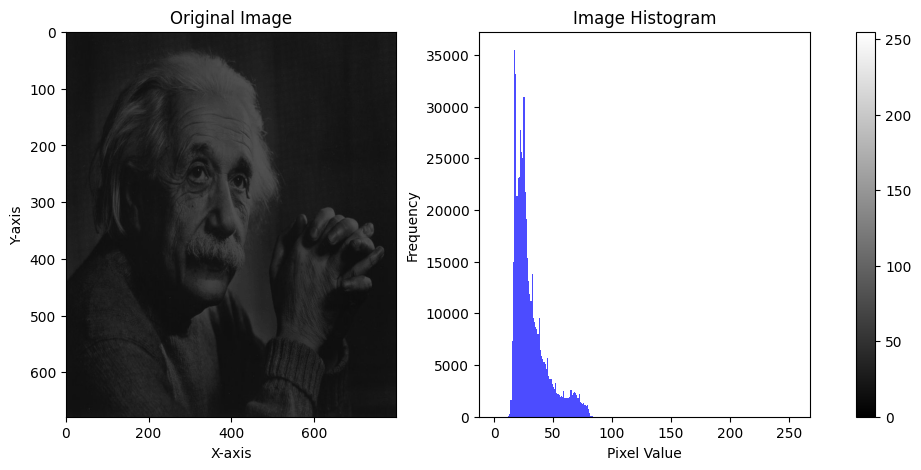

In [4]:
# CODE HERE

### 1.5 Apply linear stretching of the image
Before the stretching can be performed it is necessary to specify the upper and lower pixel value limits over which the image is to be normalized. Often these limits will just be the minimum and maximum pixel values that the image type concerned allows. For example for 8-bit graylevel images the lower and upper limits might be 0 and 255. Call the lower and the upper limits ```new_min``` and ```new_max``` respectively.

The simplest sort of normalization then scans the image to find the lowest and highest pixel values currently present in the image. Call these ```min_intensity``` and ```max_intensity```. Then each pixel P is scaled using the following function:

$ P_{out} = ((P_{in} - min_{intensity}) / (max_{intensity} - min_{intensity})) * (new_{max} - new_{min}) + new_min$

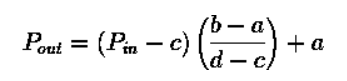

reference: [link](https://homepages.inf.ed.ac.uk/rbf/HIPR2/stretch.htm)

In [21]:
np.min(img),np.max(img)

(89, 166)

In [23]:
min_intensity = np.min(img)
max_intensity = np.max(img)
new_min = 0
new_max = 255

scaled_img = (img-min_intensity)/(max_intensity-min_intensity) * (new_max-new_min)+new_min

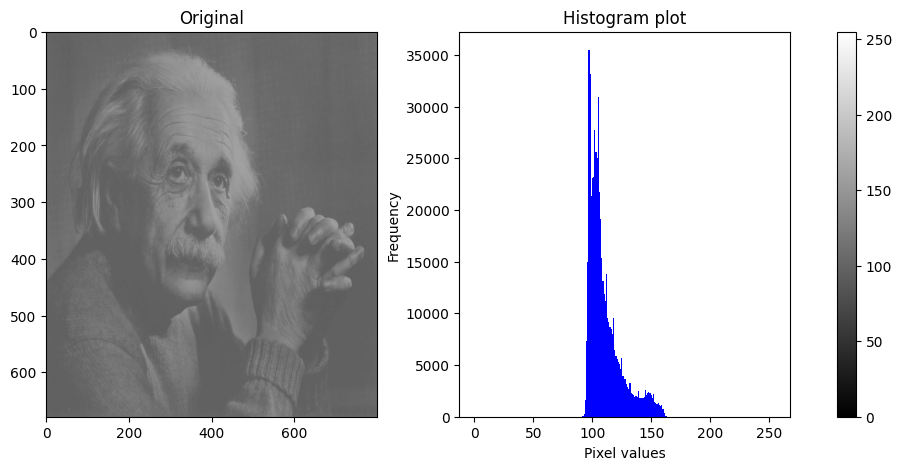

In [25]:
display_image_and_histogram(img)

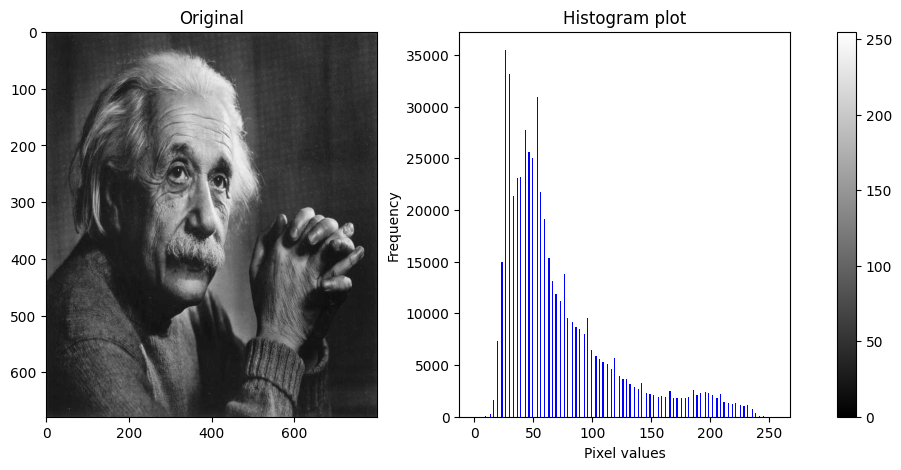

In [24]:
display_image_and_histogram(scaled_img)

In [ ]:
display_image_and_histogram(scaled_img)

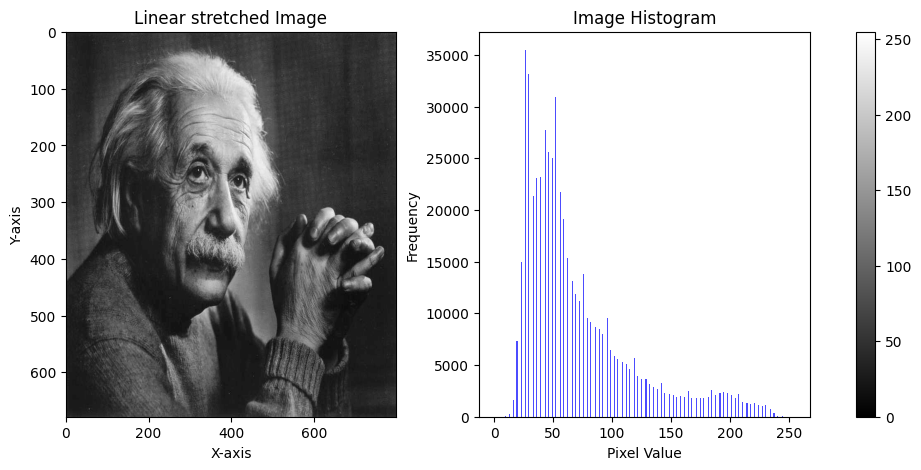

In [70]:
# CODE HERE

### 1.6 Cumulative stretching
Cumulative stretching of a histogram is a technique used in image processing to enhance the contrast of an image. It involves redistributing the pixel values in such a way that the full range of intensities is utilized. The cumulative stretching operation is performed on the cumulative distribution function (CDF) of the histogram.

Here's a step-by-step guide on how to perform cumulative stretching on a histogram:
1. **Compute the Histogram**:\
Obtain the histogram of the image. The histogram represents the distribution of pixel intensities. Hint use ```np.histogram```
2. **Compute the Cumulative Distribution Function (CDF)**:\
Calculate the cumulative distribution function (CDF) from the histogram. The CDF at a given intensity level is the sum of all histogram values up to that intensity.\
$CDF(i)= \sum^i_{j=0}H(j) $
where H(j) is the histogram value at intensity level $j$. Hint use ```np.cumsum```
3. **Normalize the CDF**:\
Normalize the CDF so that it spans the full range of pixel values. This is typically done by dividing each CDF value by the **total number of pixels** ($N_{pixels}$) in the image.
$CDF_{normalized}(i)= \frac{CDF(i)}{N_{pixels}} $\
Optional, you can round the value with 3 decimals

4. **Map the Pixel Values**:\
Now each value are normalized (0-1), so we need to replace the intensity value of each pixel scaled to the desired intensity range (e.g., 0 to 255 for 8-bit images).\
$new_{intensity}=CDF_{normalized}×(intensity_{range}−1)$


5. **Apply the Mapped Values to the Image**:\
Replace the original pixel values with the newly calculated values.

In [34]:
(cdf_normalized*255).astype(np.uint8)

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   1,   4,  11,  28,  43,  53,  64,  75,  88, 100,
       112, 126, 136, 145, 153, 159, 164, 170, 176, 181, 185, 189, 193,
       197, 201, 204, 207, 210, 212, 214, 217, 219, 221, 223, 225, 226,
       227, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240,
       240, 241, 243, 244, 245, 246, 247, 248, 249, 250, 250, 251, 252,
       252, 253, 253, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 25

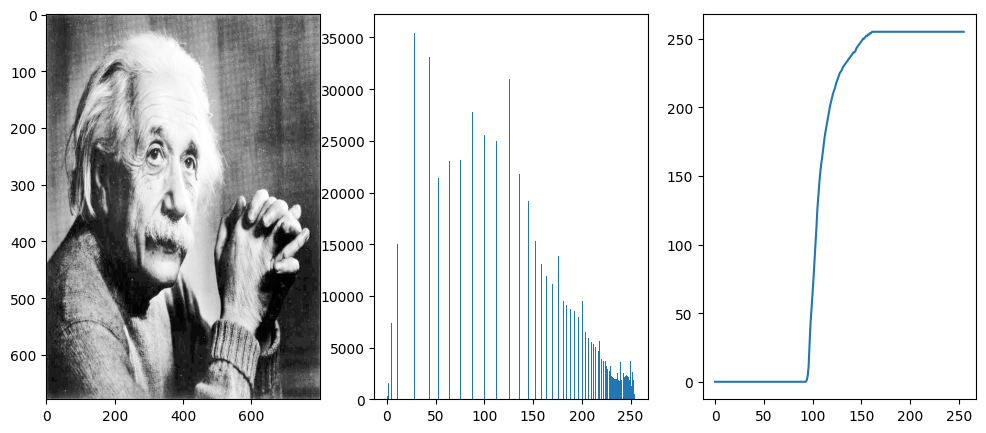

In [35]:
# Compute histogram and cumulative distribution function (CDF)
hist, bins = np.histogram(img.flatten(),256, [0,255])
cdf = np.cumsum(hist)

# Normalize the CDF
cdf_normalized = (cdf/cdf[-1]).round(3)

# Map values a
mapped_values = (cdf_normalized*255).astype(np.uint8)

# Apply the mapped values to the image
image_equalized = mapped_values[img]

fig, axes = plt.subplots(1, 3, figsize=(12, 5))
# Adjust layout to provide more space for the ylabel
axes[0].imshow(image_equalized,cmap="gray",aspect="auto")
axes[1].hist(image_equalized.flatten(), bins=256, range=(0,255))
axes[2].plot(mapped_values)


In [41]:
mapped_values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   1,   4,  11,  28,  43,  53,  64,  75,  88, 100,
       112, 126, 136, 145, 153, 159, 164, 170, 176, 181, 185, 189, 193,
       197, 201, 204, 207, 210, 212, 214, 217, 219, 221, 223, 225, 226,
       227, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240,
       240, 241, 243, 244, 245, 246, 247, 248, 249, 250, 250, 251, 252,
       252, 253, 253, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 25

In [38]:
mapped_values[108]

153

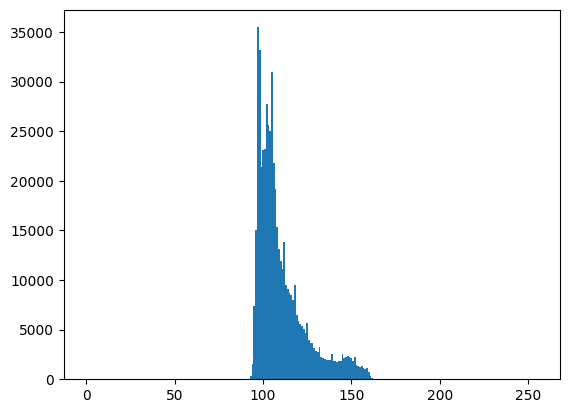

In [45]:
plt.hist(img.flatten(), bins = 256,range=(0,255))
plt.show()

In [46]:
mapped_values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   1,   4,  11,  28,  43,  53,  64,  75,  88, 100,
       112, 126, 136, 145, 153, 159, 164, 170, 176, 181, 185, 189, 193,
       197, 201, 204, 207, 210, 212, 214, 217, 219, 221, 223, 225, 226,
       227, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240,
       240, 241, 243, 244, 245, 246, 247, 248, 249, 250, 250, 251, 252,
       252, 253, 253, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 25

In [50]:
img

array([[108, 107, 106, ..., 111, 112, 113],
       [107, 107, 106, ..., 112, 113, 114],
       [106, 106, 105, ..., 111, 112, 112],
       ...,
       [103, 103, 103, ..., 104, 105, 105],
       [104, 104, 104, ..., 104, 105, 105],
       [105, 105, 105, ..., 105, 105, 106]], dtype=uint8)

In [51]:
mapped_values[113]

181

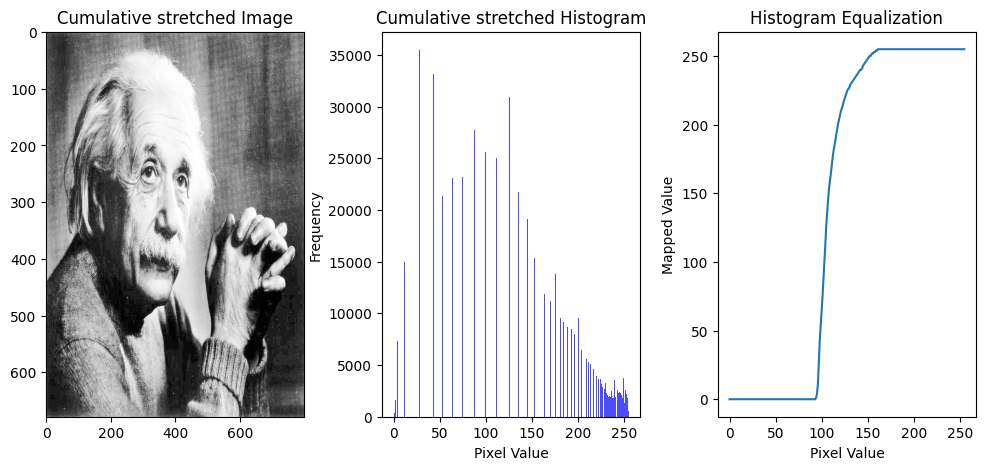

In [52]:
# Compute histogram and cumulative distribution function (CDF)
hist, bins = np.histogram(img.flatten(),256, [0,255])
cdf = np.cumsum(hist)

# Normalize the CDF
cdf_normalized = (cdf/cdf[-1]).round(3)

# Map values a
mapped_values = (cdf_normalized*255).astype(np.uint8)

# Apply the mapped values to the image
image_equalized = mapped_values[img]

fig, axes = plt.subplots(1, 3, figsize=(12, 5))
# Adjust layout to provide more space for the ylabel
plt.subplots_adjust(wspace=0.3)
# Display the Cumulative image
axes[0].imshow(image_equalized, cmap='gray', aspect='auto')
axes[0].set_title('Cumulative stretched Image')

# Figure 2: Histogram
axes[1].hist(image_equalized.flatten(), bins=256, range=(0, 255), color='blue', alpha=0.7)
axes[1].set_title('Cumulative stretched Histogram')
axes[1].set_xlabel('Pixel Value')
axes[1].set_ylabel('Frequency')
axes[1].set_adjustable('box')

# Figure 3: Plot the mapped values
axes[2].plot(mapped_values)
axes[2].set_xlabel('Pixel Value')
axes[2].set_ylabel('Mapped Value')
axes[2].set_title('Histogram Equalization')
axes[2].set_adjustable('box')


Note, What we have done here is very important. We have actually created a function (Cumulative Distribution) and then applied it to our image. Essentially, we can do that we any function! :)

### 1.7 Apply imbuilt contrast transformation
Try automatically adjusting the brightness and contrast of the original image using
```equalize_adaphist()``` at [skimage.exposure](https://scikit-image.org/docs/stable/api/skimage.exposure.html)

Contrast Limited Adaptive Histogram Equalization (CLAHE) is a technique used to improve the local contrast of an image. Unlike global histogram equalization, CLAHE operates on small regions of the image, applying histogram equalization independently to each region. This helps to prevent over-amplification of noise.

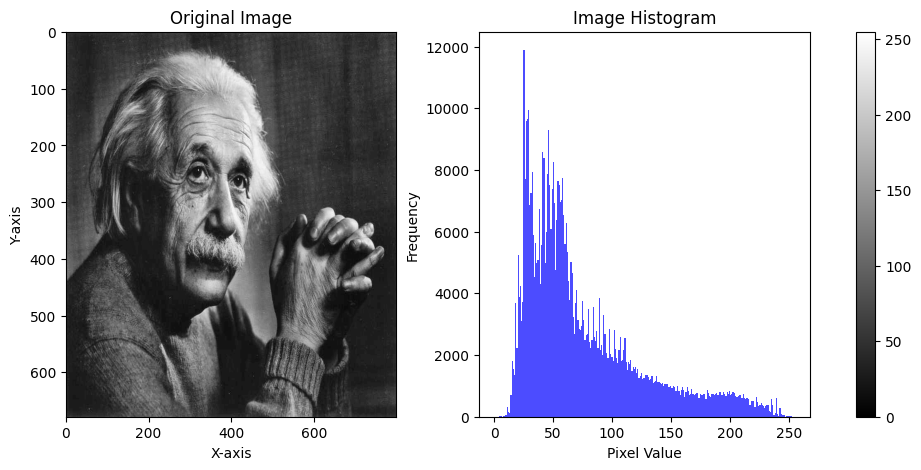

In [39]:
# CODE HERE

### 2.1 Load image 
Load image 'blood1.tif' (available on Moodle) and convert it to grayscale and double format\
Hint: look in ```skimage.io``` when you want to load/read and image

In [35]:
# CODE HERE

### 2.2 Plot histgram of ```img_gray```
plot the histogram of ```img_gray``` and choose a threshold that you think makes sense to divide the foreground and background.

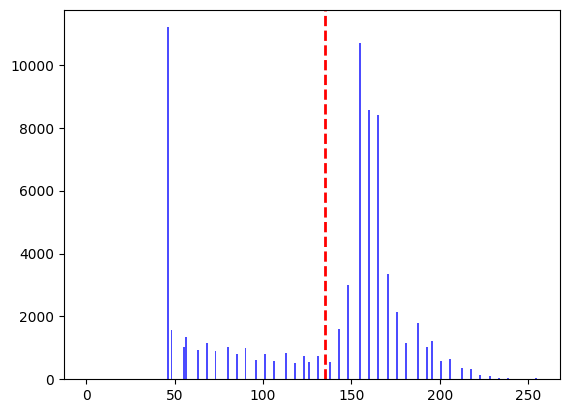

In [6]:
# CODE HERE

### 2.3 Apply manuel threshold

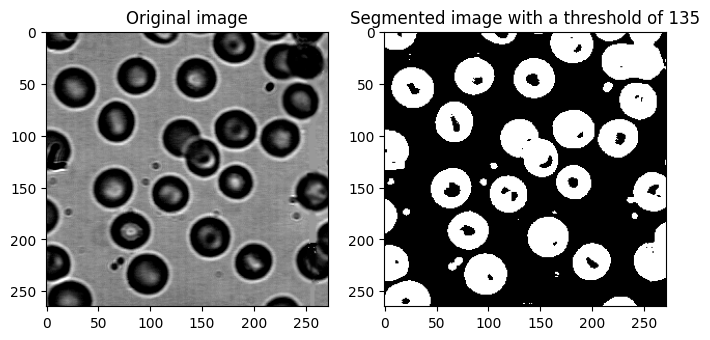

In [7]:
# CODE HERE

### 2.4 Apply Otsu method to choose the threshold
Use the library ```skimage.filters.threshold_otsu``` ([link](https://scikit-image.org/docs/stable/api/skimage.filters.html)) on the image to choose the Otzu threshold
Plot the original, manually chosen threshold and Otzu threshold images next to each other

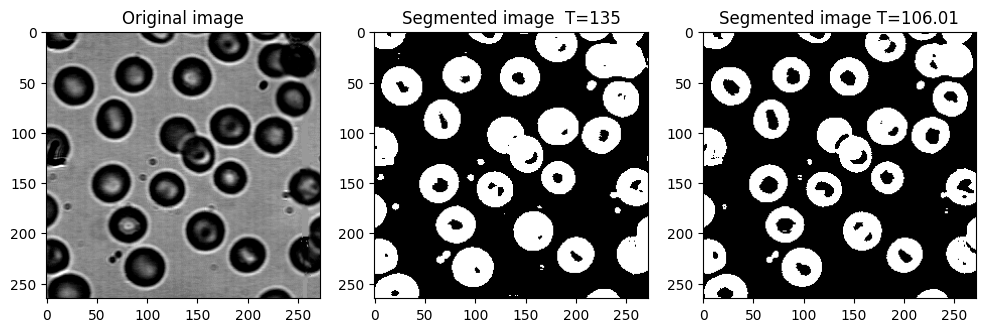

In [ ]:
# CODE HERE
# Threshold the image, use Otsu’s method to choose the threshold value
threshold_otsu =

### 2.5 Create salt and pepper noise on the image
Create some random noise on the image using the package ```util.random_noise```.

* Question: Why do we need to normalize the image??

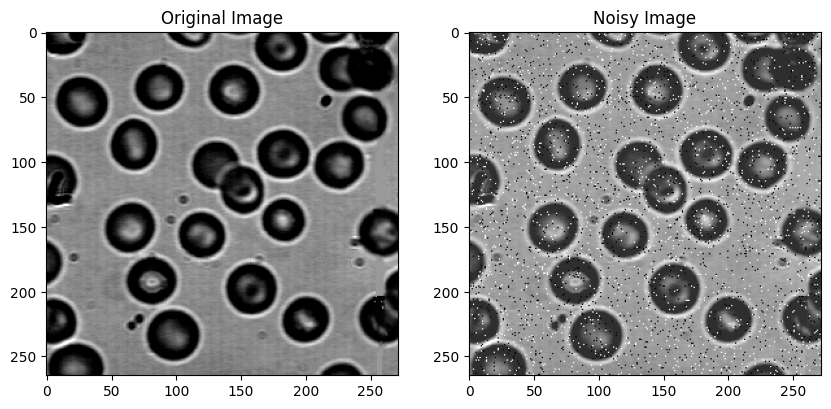

In [42]:
# CODE HERE

### 2.6 Subtract images
1. subtract ```img_gray_norm``` from ```img_noisy``` and call it ```img_sub1```
2. subtract ```img_noisy``` from ```img_gray_norm``` and call it ```img_sub2```
3. Calculate the absolute difference between blood1 and blood1_noisy


In [3]:
# CODE HERE
min_val = -125
max_val = 120
image = -120
# Normalize the image
normalized_image = (image - min_val) / (max_val - min_val)
normalized_image

0.02040816326530612

### 2.7 Display images

Show the two original images (```img_gray``` and ```img_noisy```) and the three resulting images in one figure.\

Hint: 
* Look at the documentation at ```matplotlib``` where we talk about [axis](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axis.html) to keep a empty figure
* Remember to set ```vmin``` when plotting ```img_sub1``` and ```img_sub2```

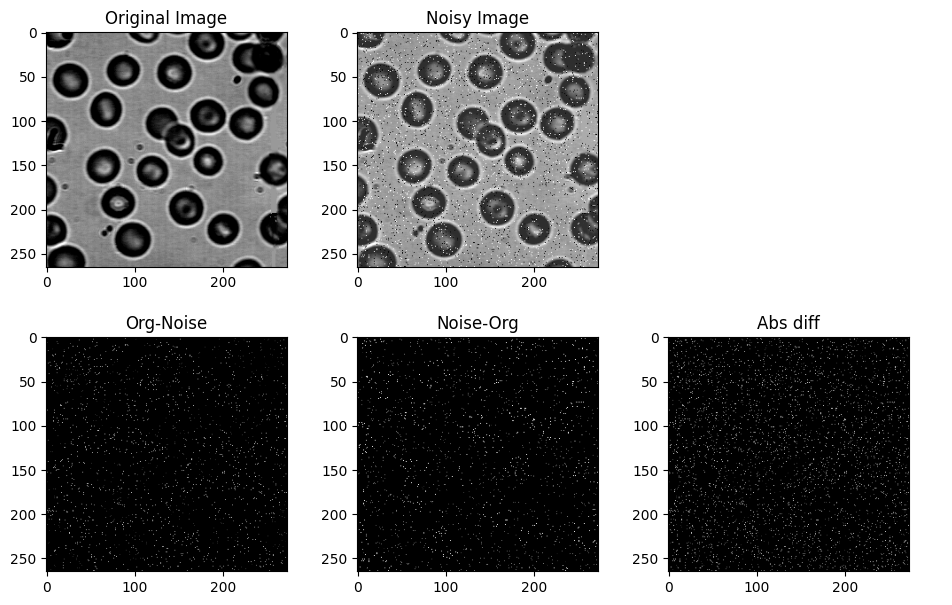

In [75]:
# CODE HERE

Think ```org-noise``` if it is 0 (black in 1 pixel) and then we substract it with a white noise pixel that is 1, then it is 0-1 = -1 => 0 and will be black. Because we are not including values below 0. This is known as negative values are **clipped**

### 2.7.1 Explain the three results. 
* Why are they different? What happens when you subtract a high number from a low number? 
* What happens if you do the same using absolute difference?


### 2.8 Apply binary mask to an image
Use the image ```b_mask``` as a mask on the image ```blood1```. It means that for all the pixels where ```b_mask``` is white, you should keep the pixel value of ```blood1```, and where ```b_mask``` is black, we make the pixel black.\
This results in an image where the blood cells are shown on a black background.
* Display the mask

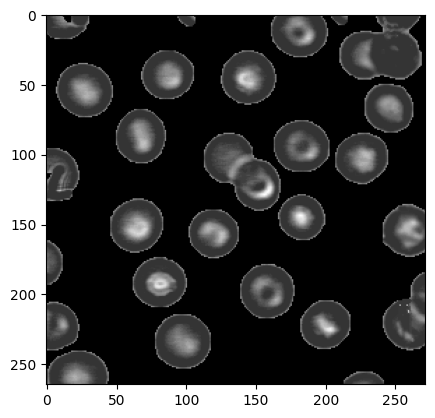

In [77]:
# CODE HERE